<a href="https://colab.research.google.com/github/prachiarya0067/FirmsLobbyAlone/blob/main/lobbyalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#install packages
import pandas as pd

import requests

import io

import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


In [66]:
#Import LobbyView Data sets 
clients = pd.read_csv("/content/drive/MyDrive/dataset___client_level.csv")

issues = pd.read_csv("/content/drive/MyDrive/dataset___issue_level.csv")

reports = pd.read_csv("/content/drive/MyDrive/dataset___report_level.csv")

text = pd.read_csv("/content/drive/MyDrive/dataset___issue_text.csv")



In [69]:
#extract lobby reports that mention Trade- Foreign & Domestic as their issue area code

issuestrd = issues.loc[issues['issue_code'] == "TRD"] 

#extract report texts that mention Trade- Foreign & Domestic as their issue area code

texttrd = text.loc[text['issue_code'] == "TRD"] 

#merge all LobbyView datasets on the issue of "TRD"

reporttexttrd = pd.merge(texttrd, reports)

reporttextclienttrd = pd.merge(reporttexttrd, clients)

reporttextclientissuestrd = pd.merge(reporttextclienttrd, issuestrd)


In [74]:
main = reporttextclientissuestrd

Preparing and merging LobbyView data sets for analysis


In [70]:
#drop reports with no desciption of the lobbying activity
mainwithtext = main.dropna(subset=['issue_text']).reset_index(drop=True)

#Extract all reports on trade for the years 2018 onwards
trade2018onwards = mainwithtext.loc[mainwithtext['report_year']>=2018].reset_index(drop=True)

#Replace NaN NAICS values with 0
trade2018onwards['primary_naics'] = trade2018onwards['primary_naics'].fillna(0)

#Select a subset of the trade2018onwards dataframe
clientnaics = trade2018onwards[["client_name", "primary_naics"]]

#Select a subset of the trade2018onwards dataframe
allreports2018 = trade2018onwards[["client_uuid", "client_name", "issue_text"]]

#Change all issue text to string type
allreports2018['issue_text'] = allreports2018['issue_text'].apply(str)

#Create a dataframe of all clients who lobbied on trade 2018 onwards and the number of reports they filed in the period
clients2018 = trade2018onwards['client_name'].value_counts().rename_axis('client_name').reset_index(name='numberofreports')

#merge client level data with unique client naics
df3 = clients2018.merge(clientnaics.drop_duplicates(), on="client_name")

#assign naics values for those provided by LobbyView
df3["naics"] = df3["primary_naics"]

#Assign values if client is firm, 1 by default, handcoded to 0 for organisations
df3["if_firm"] = 1

del df3['numberofreports']

In [81]:
#Replicate Figure 1

main1 = main

#NAICS Code 813910 corresponds to industry association; designate associations and indivudal firms on the same basis

main1['firm_lobbying'] = np.where(main1['primary_naics']!= 813910.0, 1, 0)

main1['association_lobbying'] = np.where(main1['primary_naics'] == 813910.0, 1, 0)

#count the number of firms and associations lobbying for each year

main1["individual"] = main1.groupby('report_year', as_index=False)["firm_lobbying"].transform("sum")

main1["associational"] = main1.groupby('report_year', as_index=False)["association_lobbying"].transform("sum")

main1

,report_uuid,issue_ordi,issue_code,issue_text,client_uuid,registrant_uuid,registrant_name,report_year,report_quarter_code,amount,is_no_activity,is_client_self_filer,is_amendment,client_name,gvkey,bvdid,primary_naics,gov_entity,firm_lobbying,association_lobbying,individual,associational
0,d72db36b-cdfb-5b40-90ae-9d14d683a044,1,TRD,Ethanol tariff and subsidies (VEETC),9531ac6b-02c2-5f8c-81c6-c560ab06c2b0,b5d7a9a5-f359-5707-898a-c11bcb451f3b,UNICA - BRAZILIAN SUGARCANE INDUSTRY ASSOCIATION,2010,4,"$100,000.00",f,t,f,UNICA - Brazilian Sugarcane Industry Association,NaN,NaN,NaN,"{""HOUSE OF REPRESENTATIVES"",SENATE}",1,0,3106,254
1,1a0ab2f4-750c-565e-9f2f-0397cb252e7c,1,TRD,ethanol import tariff,9531ac6b-02c2-5f8c-81c6-c560ab06c2b0,b5d7a9a5-f359-5707-898a-c11bcb451f3b,UNICA - BRAZILIAN SUGARCANE INDUSTRY ASSOCIATION,2011,2,"$74,000.00",f,t,t,UNICA - Brazilian Sugarcane Industry Association,NaN,NaN,NaN,"{""HOUSE OF REPRESENTATIVES"",SENATE}",1,0,3405,269
2,aa6369a8-a21e-5aa3-adfb-b4c8049ba874,1,TRD,Ethanol Trade,9531ac6b-02c2-5f8c-81c6-c560ab06c2b0,b5d7a9a5-f359-5707-898a-c11bcb451f3b,UNICA - BRAZILIAN SUGARCANE INDUSTRY ASSOCIATION,2012,1,"$10,000.00",f,t,t,UNICA - Brazilian Sugarcane Industry Association,NaN,NaN,NaN,"{""HOUSE OF REPRESENTATIVES"",SENATE}",1,0,3450,284
3,7e8e96f9-2455-521c-a8f3-95772bd96415,2,TRD,Issues related to ethanol and biofuels.,9531ac6b-02c2-5f8c-81c6-c560ab06c2b0,a2242938-34c4-58c3-9ae9-b6b4b488c426,"MEHLMAN CASTAGNETTI ROSEN & THOMAS, INC.",2012,1,"$10,000.00",f,f,f,UNICA - Brazilian Sugarcane Industry Association,NaN,NaN,NaN,"{""DEPARTMENT OF STATE"",""HOUSE OF REPRESENTATIV...",1,0,3450,284
4,ef9b67f3-1a08-5144-9e5b-bf9f030af719,1,TRD,Renewable Fuel Standard,9531ac6b-02c2-5f8c-81c6-c560ab06c2b0,b5d7a9a5-f359-5707-898a-c11bcb451f3b,UNICA - BRAZILIAN SUGARCANE INDUSTRY ASSOCIATION,2018,2,$0.00,f,t,t,UNICA - Brazilian Sugarcane Industry Association,NaN,NaN,NaN,"{""HOUSE OF REPRESENTATIVES"",SENATE}",1,0,5581,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77055,4840a6be-e341-5068-90bb-1a859d375b0c,7,TRD,Worked with Senate offices on supply chain iss...,d36a1dce-0ffd-5671-8bf3-6f03dd3b1a4e,24456b58-5ff9-51fe-8ea4-64730531e60d,"WATER STRATEGIES, LLC",2020,2,$0.00,f,f,f,Northwest Pipe Company,61635.0,US930557988,331210.0,"{""BUREAU OF RECLAMATION"",""HOUSE OF REPRESENTAT...",1,0,2882,251
77056,064943aa-bc05-5276-b3e4-3a38487cec33,4,TRD,COVID impact on international manufacturing an...,6d4b95ba-e997-51d4-8212-10f8b7a93e77,d4c33168-6290-595c-b215-f79922498c82,"BANNER PUBLIC AFFAIRS, LLC",2020,2,"$50,000.00",f,f,t,Nidec Americas Holding Corporation,NaN,US275712308L,NaN,"{""DEPARTMENT OF COMMERCE"",""DEPARTMENT OF HOMEL...",1,0,2882,251
77057,47172b23-1c36-5879-8237-296277a6a37e,2,TRD,Economic development and trade issues.,d8c641c2-f773-52b4-a25d-e7729172e317,f9694e44-8f67-575d-b0a7-99b69a1a023b,BALLARD PARTNERS,2020,2,"$20,000.00",f,f,t,"Boxercraft, Inc.",NaN,NaN,424320.0,"{""HOUSE OF REPRESENTATIVES""}",1,0,2882,251
77058,ee466c69-ed8e-5b7f-9890-9f997d0d6bd7,2,TRD,Issues related to agriculture and internationa...,c81cd842-3b1d-526a-a029-bc60e599bbf3,e00bd78d-20f7-5215-b337-b2f0c6d10e81,"BROWNSTEIN, HYATT, FARBER, SCHRECK, LLP",2020,2,"$70,000.00",f,f,f,J&F Investimentos S.A.,NaN,NaN,NaN,NaN,1,0,2882,251


In [83]:
#Subset of lobbying clients from the main1 dataframe

mainsum = main1[["report_year", "individual", "associational"]]

#Keep only unique client values

mainsum = mainsum.drop_duplicates().reset_index(drop=True)

mainsum

,report_year,individual,associational
0,2010,3106,254
1,2011,3405,269
2,2012,3450,284
3,2018,5581,481
4,2013,3597,296
5,2014,3831,329
6,2019,6248,555
7,2008,3881,284
8,2015,4585,369
9,2016,4131,350


In [84]:
#Sort dataframe by year

mainsum = mainsum.sort_values(by = "report_year", ascending=True)

#Change year to str object
mainsum["report_year"] = mainsum["report_year"].astype("str")

mainsum = mainsum.iloc[0:-1]

mainsum

,report_year,individual,associational
21,1999,1948,119
20,2000,2325,148
19,2001,2058,138
16,2002,2511,173
17,2003,1890,140
18,2004,1802,129
13,2005,2130,164
12,2006,2209,155
14,2007,2296,163
7,2008,3881,284


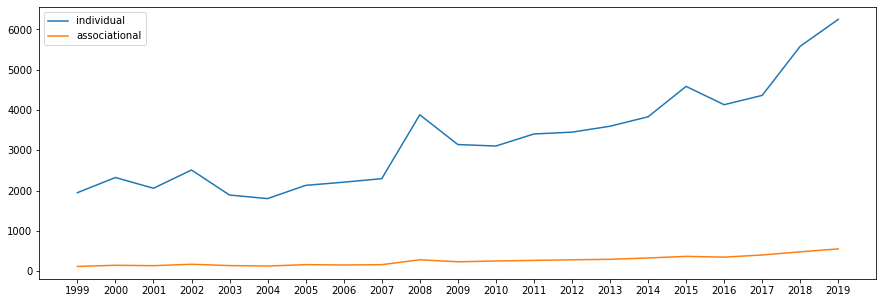

In [85]:
#Figure 1 in the paper, as on Page 6

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(mainsum["report_year"], mainsum["individual"], label="individual")

ax.plot(mainsum["report_year"], mainsum["associational"], label="associational")

ax.legend()

plt.show()

In [86]:
#Upload handcoded naics values for lobby clients

updatednaics = pd.read_csv("/content/drive/MyDrive/datafinal.csv")



Natural Language Processing


In [87]:
# Run in python console
import nltk; nltk.download('stopwords')

# Run in terminal or command prompt
!python3 -m spacy download en

# Import spacy
import spacy

# Import pyLDAvis
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [88]:
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.coherencemodel import CoherenceModel


# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [89]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','related', 'regarding', 'regard', 'relating', 'general', 'from', 're', 'issues', 'discussion', 'matter','relation'])



In [90]:
# Convert to list
data = allreports2018.issue_text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Renewable Fuel Standard']


In [91]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['renewable', 'fuel', 'standard']]


In [92]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=15)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['renewable_fuel', 'standard']


In [93]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [95]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB','ADJ', 'ADV'])

print(data_lemmatized[:1])

[['standard']]


In [96]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


[[(0, 1)]]


In [97]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=45,
                                           iterations=1000,
                                           update_every=1000,
                                           chunksize=7000,
                                           passes=250,
                                           alpha='auto',
                                           per_word_topics=True)


In [98]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.084*"support" + 0.038*"enforcement" + 0.028*"duty" + 0.024*"law" + '
  '0.019*"implementation" + 0.015*"rule" + 0.015*"custom" + 0.015*"include" + '
  '0.015*"passage" + 0.014*"country"'),
 (1,
  '0.061*"support" + 0.041*"act" + 0.029*"export" + 0.028*"agricultural" + '
  '0.025*"program" + 0.019*"product" + 0.019*"lobby" + 0.017*"regulation" + '
  '0.016*"market" + 0.014*"modernization"'),
 (2,
  '0.128*"section" + 0.069*"aluminum" + 0.067*"steel" + 0.064*"tariff" + '
  '0.055*"investigation" + 0.043*"import" + 0.016*"impact" + 0.016*"trade" + '
  '0.014*"action" + 0.013*"negotiation"'),
 (3,
  '0.064*"usmca" + 0.059*"impact" + 0.052*"product" + 0.040*"implementation" + '
  '0.037*"tariff" + 0.029*"policy" + 0.025*"regulatory" + 0.024*"negotiation" '
  '+ 0.024*"chinese" + 0.023*"agriculture"'),
 (4,
  '0.112*"monitor" + 0.090*"trade" + 0.058*"legislation" + 0.035*"relation" + '
  '0.028*"export" + 0.026*"economic" + 0.024*"development" + 0.021*"sanction" '
  '+ 0.020*"inter

In [99]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.678369315473264

Coherence Score:  0.4839793334783156


In [36]:
# !pip uninstall pandas --y
# !pip install pandas==1.1.5 --y


Uninstalling pandas-1.2.4:
  Successfully uninstalled pandas-1.2.4

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --y


In [100]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

# %matplotlib inline

# vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=id2word)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.124359 -0.219126       1        1  26.999708
5     -0.028006 -0.133429       2        1  12.234736
2     -0.107394  0.204455       3        1  11.452592
1      0.226333  0.008707       4        1   8.046407
8     -0.185786  0.102720       5        1   8.038104
9      0.068715 -0.014206       6        1   7.234365
6     -0.110148  0.070524       7        1   6.944466
4      0.018980 -0.199518       8        1   6.860098
3     -0.023711  0.093811       9        1   6.785617
0      0.265376  0.086062      10        1   5.403906, topic_info=            Term          Freq         Total Category  logprob  loglift
1          trade  10321.000000  10321.000000  Default  30.0000  30.0000
40        tariff   3380.000000   3380.000000  Default  29.0000  29.0000
38       section   1818.000000   1818.000000  Default  28.0000  28.0000
3      agreement   3713.000000   3713.000000  Default  27.0000  27.0000
44       monitor    747.000000    747.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
91       include     78.883624   1762.544491  Topic10  -4.1957  -0.1885
169  legislation     56.253152    772.105839  Topic10  -4.5338   0.2988
443   government     40.953016    198.619345  Topic10  -4.8513   1.3391
581     domestic     39.685391    228.163889  Topic10  -4.8827   1.1690
72       product     38.846268    784.464054  Topic10  -4.9041  -0.0873

[707 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
194       1  0.384113  access
194       2  0.021006  access
194       4  0.192056  access
194       7  0.321094  access
194       9  0.081024  access
...     ...       ...     ...
460       4  0.125992    work
460       6  0.335980    work
460       8  0.133628    work
43        2  0.809457     wto
43        5  0.161891     wto

[1204 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 3, 2, 9, 10, 7, 5, 4, 1])

In [101]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6785,"usmca, impact, product, implementation, tariff...",Renewable Fuel Standard
1,1,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade
2,2,4.0,0.6786,"monitor, trade, legislation, relation, export,...",General Monitoring
3,3,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.
4,4,7.0,0.7703,"trade, agreement, policy, free, include, negot...",EU-US Privacy Shield; international trade agre...
5,5,7.0,0.9647,"trade, agreement, policy, free, include, negot...",Freedom of expression and intellectual propert...
6,6,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.
7,7,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade
8,8,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.
9,9,7.0,0.9647,"trade, agreement, policy, free, include, negot...",Freedom of expression and intellectual propert...


In [103]:
#Reproducing Table in the Appendix 

appendix = df_dominant_topic[["Dominant_Topic", "Keywords"]]
appendix = appendix.drop_duplicates().reset_index(drop=True)
appendix = appendix.sort_values(["Dominant_Topic"]).reset_index(drop=True)
appendix["Intermediate_Issue"] = ["Customs/Duty rules", "Support for Argricultural Exports", "Section 203 Investigations", "US-Mexico-Canada FTA", "Trade Legislation", "Product inclusions in FTAs", "FTA renegeotiations", "Bilateral Negotiations", "Tariff Ecxlusion/Exemptions", "National Security"]

appendix

,Dominant_Topic,Keywords,Intermediate_Issue
0,0.0,"support, enforcement, duty, law, implementatio...",Customs/Duty rules
1,1.0,"support, act, export, agricultural, program, p...",Support for Argricultural Exports
2,2.0,"section, aluminum, steel, tariff, investigatio...",Section 203 Investigations
3,3.0,"usmca, impact, product, implementation, tariff...",US-Mexico-Canada FTA
4,4.0,"monitor, trade, legislation, relation, export,...",Trade Legislation
5,5.0,"trade, agreement, act, include, enforcement, t...",Product inclusions in FTAs
6,6.0,"import, trade, tariff, renegotiation, export, ...",FTA renegeotiations
7,7.0,"trade, agreement, policy, free, include, negot...",Bilateral Negotiations
8,8.0,"tariff, trade, import, section, propose, expor...",Tariff Ecxlusion/Exemptions
9,9.0,"provision, global, security, bill, agreement, ...",National Security


In [150]:
#Merging reports with clients 

df5 = df_dominant_topic
df5["client_name"] = trade2018onwards["client_name"]
df5

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,client_name
0,0,3.0,0.6785,"usmca, impact, product, implementation, tariff...",Renewable Fuel Standard,UNICA - Brazilian Sugarcane Industry Association
1,1,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade,Wing (formerly X (Google Inc.))
2,2,4.0,0.6786,"monitor, trade, legislation, relation, export,...",General Monitoring,Wing (formerly X (Google Inc.))
3,3,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.,Wing (formerly X (Google Inc.))
4,4,7.0,0.7703,"trade, agreement, policy, free, include, negot...",EU-US Privacy Shield; international trade agre...,Wing (formerly X (Google Inc.))
...,...,...,...,...,...,...
15993,15993,6.0,0.4100,"import, trade, tariff, renegotiation, export, ...",Section 301 tariffs on LCD cells.,"Manufacturing Resources International, Inc."
15994,15994,2.0,0.8945,"section, aluminum, steel, tariff, investigatio...",Worked with Senate offices on supply chain iss...,Northwest Pipe Company
15995,15995,8.0,0.5551,"tariff, trade, import, section, propose, expor...",COVID impact on international manufacturing an...,Nidec Americas Holding Corporation
15996,15996,4.0,0.8053,"monitor, trade, legislation, relation, export,...",Economic development and trade issues.,"Boxercraft, Inc."


In [151]:
naics2018only = updatednaics[["client_name", "naics", "if_firm"]]
naics2018only

,client_name,naics,if_firm
0,"ANHEUSER-BUSCH COMPANIES, INC",312120.0,1
1,ZEBRA TECHNOLOGIES CORPORATION,334118.0,1
2,Perspecta formerly known as DXC Technologies,541213.0,1
3,Association of Equipment Manufacturers,333.0,0
4,"TOYOTA MOTOR NORTH AMERICA, INC.",336111.0,1
...,...,...,...
1875,Colt's Manufacturing Company LLC,332994.0,1
1876,"Goodman Global, Inc.",333415.0,1
1877,Alexion Pharmaceuticals,325414.0,1
1878,The Carlyle Group,523920.0,1


In [152]:
#Merging LDA-applied text to client and naics
df5 = df5.merge(naics2018only, on = "client_name")
df5

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,client_name,naics,if_firm
0,0,3.0,0.6785,"usmca, impact, product, implementation, tariff...",Renewable Fuel Standard,UNICA - Brazilian Sugarcane Industry Association,0.0,1
1,1,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade,Wing (formerly X (Google Inc.)),519130.0,1
2,2,4.0,0.6786,"monitor, trade, legislation, relation, export,...",General Monitoring,Wing (formerly X (Google Inc.)),519130.0,1
3,3,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.,Wing (formerly X (Google Inc.)),519130.0,1
4,4,7.0,0.7703,"trade, agreement, policy, free, include, negot...",EU-US Privacy Shield; international trade agre...,Wing (formerly X (Google Inc.)),519130.0,1
...,...,...,...,...,...,...,...,...
15963,15993,6.0,0.4100,"import, trade, tariff, renegotiation, export, ...",Section 301 tariffs on LCD cells.,"Manufacturing Resources International, Inc.",237110.0,1
15964,15994,2.0,0.8945,"section, aluminum, steel, tariff, investigatio...",Worked with Senate offices on supply chain iss...,Northwest Pipe Company,331210.0,1
15965,15995,8.0,0.5551,"tariff, trade, import, section, propose, expor...",COVID impact on international manufacturing an...,Nidec Americas Holding Corporation,0.0,1
15966,15996,4.0,0.8053,"monitor, trade, legislation, relation, export,...",Economic development and trade issues.,"Boxercraft, Inc.",424320.0,1


In [153]:
#Function to count the number of characters in a given object
def count_digits(string):
    return sum(item.isdigit() for item in string)

In [154]:
#Remove decimals from NAICS. alues after onverting them to str type

df5['naics'] = df5['naics'].astype(str).replace('\.0', '', regex=True)

#if_firm dummy variable converted to int  

df5["if_firm"] = df5['if_firm'].astype(int)

#count_digits function applied

df5['digits'] = df5['naics'].apply(count_digits)

In [155]:
#Proportion of firms as lobby clients for each NAIC industry
result = df5.groupby('naics').agg({'if_firm': ['mean']})
result

,if_firm
,mean
naics,
0,0.950954
111,1.000000
111110,0.000000
111140,0.000000
111150,0.000000
...,...
813990,1.000000
921120,1.000000


In [156]:
df5 = df5.merge(result, on = 'naics')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  msg = (


In [157]:
#Compute unique number of Dominant topics for all documents in a NAICS industry

df5['complexity'] = df5.groupby('naics')['Dominant_Topic'].transform('nunique') #count(distinct)

df5

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,client_name,naics,if_firm,digits,"(if_firm, mean)",complexity
0,0,3.0,0.6785,"usmca, impact, product, implementation, tariff...",Renewable Fuel Standard,UNICA - Brazilian Sugarcane Industry Association,0,1,1,0.950954,10
1,590,4.0,0.6142,"monitor, trade, legislation, relation, export,...",Support Congressional actions to establish a f...,COALITION FOR EMPLOYMENT THROUGH EXPORTS,0,1,1,0.950954,10
2,591,4.0,0.6142,"monitor, trade, legislation, relation, export,...",Support Congressional actions to establish a f...,COALITION FOR EMPLOYMENT THROUGH EXPORTS,0,1,1,0.950954,10
3,592,4.0,0.5992,"monitor, trade, legislation, relation, export,...",Support Congressional actions to establish a f...,COALITION FOR EMPLOYMENT THROUGH EXPORTS,0,1,1,0.950954,10
4,862,7.0,0.6467,"trade, agreement, policy, free, include, negot...",Interational Trade Agreements Export Import Ba...,MECACC PREVIOUSLY KNOWN AS AMERICAN BUSINESS C...,0,1,1,0.950954,10
...,...,...,...,...,...,...,...,...,...,...,...
15963,15971,7.0,0.3068,"trade, agreement, policy, free, include, negot...",Import Issues,"Permalite, Inc",322230,1,6,1.000000,1
15964,15972,7.0,0.3068,"trade, agreement, policy, free, include, negot...",Import Issues,"Permalite, Inc",322230,1,6,1.000000,1
15965,15983,5.0,0.8579,"trade, agreement, act, include, enforcement, t...","ExIm Bank Reauthorization, foreign military sa...",AEROSPACE INDUSTRIES ASSN,336400,0,6,0.000000,1
15966,15984,5.0,0.8579,"trade, agreement, act, include, enforcement, t...","ExIm Bank Reauthorization, foreign military sa...",AEROSPACE INDUSTRIES ASSN,336400,0,6,0.000000,1


In [158]:
#Import US Census Bureau data for all NAICS industries, including number of firms

industry_emp = pd.read_csv("/content/drive/MyDrive/us_6digitnaics_2016.csv")

industry_emp

,Table with row headers in column A and column headers in rows 5 through 7,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Code,NAICS_DESCRIPTION,ET_EMPLOYMENT_SIZE,NUMBER_FIRMS,NUMBER_EST,EMPLOYMENT,RANGEFLAG,EMPNOSEFLAG,PAYROLL,PAYROLLNOISE
1,--,Total,01: Total,"5,954,684","7,757,807","126,752,238",NaN,G,"6,435,142,055",G
2,--,Total,02: 0-4,"3,665,182","3,671,901","5,923,452",NaN,G,"268,039,737",G
3,--,Total,03: 5-9,"1,013,878","1,025,690","6,681,968",NaN,G,"248,985,263",G
4,--,Total,04: 10-19,"626,900","657,781","8,432,521",NaN,G,"329,388,425",G
...,...,...,...,...,...,...,...,...,...,...
18059,99,Industries not classified,03: 5-9,568,568,"3,500",NaN,G,"67,105",G
18060,99,Industries not classified,04: 10-19,116,116,"1,529",NaN,G,"25,323",G
18061,99,Industries not classified,05: <20,"17,718","17,718","22,422",NaN,J,"531,645",G
18062,99,Industries not classified,06: 20-99,32,32,754,NaN,G,"7,951",G


In [159]:
new_header = industry_emp.iloc[0] #grab the first row for the header

industry_emp = industry_emp[1:] #take the data less the header row

industry_emp.columns = new_header #set the header row as the df header

In [160]:
#Number of total establishments for the entire industry

a = industry_emp.iloc[0:1, 2:3].values

a

array([['01:  Total']], dtype=object)

In [161]:
#Apply count_digits to NAICS code in the Census Bureau Dataset

industry_emp["digits"] = industry_emp["Code"].apply(count_digits)

In [162]:
#Subset includes all six-digit NAICS industries

industry_emp_six = industry_emp[industry_emp['digits']==6]

#Subset includes NAICS code, number of establishments by industry, and employment categories

industry_emp_six = industry_emp_six[['Code', 'NUMBER_FIRMS','ET_EMPLOYMENT_SIZE']]

#Select total number of establishments by industry

industry_emp_six = industry_emp_six[industry_emp_six["ET_EMPLOYMENT_SIZE"] == "01:  Total" ]

#Rename "code" column to "naics" for compatibility with other datasets

industry_emp_six = industry_emp_six.rename(columns = {"Code":"naics"})

#Remove commas

industry_emp_six = industry_emp_six.replace(',',"")

In [163]:
# Assign new column as the one containing proportion of all lobbying clients that are firms\

df5['firm_prpn'] = df5.iloc[:,-2]

In [164]:
#Drop all observations where NAICS value is 0 

df5= df5[df5['naics'] != "0"].reset_index()


In [165]:
#Remove all all observations where naics value contains letters

df5 = df5[~df5['naics'].str.contains("[a-zA-Z]").fillna(False)]


In [166]:
df5['lobby_units'] = df5.groupby('naics')['client_name'].transform('nunique') #count(distinct)


In [167]:
df5['naics'].value_counts()

325412    592
334413    328
519130    270
336111    251
324110    230
         ... 
488991      1
212311      1
327991      1
722310      1
331513      1
Name: naics, Length: 554, dtype: int64

In [170]:
#Drop all NAICS industries with less than 2 lobby units

df5 = df5[df5["lobby_units"]>=2]

In [171]:
df5["naics"].value_counts()

325412    592
334413    328
519130    270
336111    251
324110    230
         ... 
313310      4
335912      3
541611      3
453220      2
333924      2
Name: naics, Length: 290, dtype: int64

In [172]:
df5

,index,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,client_name,naics,if_firm,digits,"(if_firm, mean)",complexity,firm_prpn,lobby_units
0,734,1,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15
1,735,2,4.0,0.6786,"monitor, trade, legislation, relation, export,...",General Monitoring,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15
2,736,3,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15
3,737,4,7.0,0.7703,"trade, agreement, policy, free, include, negot...",EU-US Privacy Shield; international trade agre...,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15
4,738,5,7.0,0.9647,"trade, agreement, policy, free, include, negot...",Freedom of expression and intellectual propert...,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15130,15864,15702,8.0,0.8939,"tariff, trade, import, section, propose, expor...",Trade issues as they relate to seafood products.,"CenSea, Inc.",424420,1,6,1.0,3,1.0,4
15131,15865,15703,8.0,0.8939,"tariff, trade, import, section, propose, expor...",Trade issues as they relate to seafood products.,"CenSea, Inc.",424420,1,6,1.0,3,1.0,4
15132,15866,15914,7.0,0.3068,"trade, agreement, policy, free, include, negot...",USMCA,SCHWAN'S COMPANY,424420,1,6,1.0,3,1.0,4
15133,15867,15915,4.0,0.4110,"monitor, trade, legislation, relation, export,...",Mexico labeling requirements,SCHWAN'S COMPANY,424420,1,6,1.0,3,1.0,4


In [173]:
#Merge with Census Bureau data 

finaldataset = df5.merge(industry_emp_six, on = 'naics').reset_index(drop = True)

finaldataset

,index,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,client_name,naics,if_firm,digits,"(if_firm, mean)",complexity,firm_prpn,lobby_units,NUMBER_FIRMS,ET_EMPLOYMENT_SIZE
0,734,1,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15,"6,475",01: Total
1,735,2,4.0,0.6786,"monitor, trade, legislation, relation, export,...",General Monitoring,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15,"6,475",01: Total
2,736,3,7.0,0.7581,"trade, agreement, policy, free, include, negot...",Issues related to international trade.,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15,"6,475",01: Total
3,737,4,7.0,0.7703,"trade, agreement, policy, free, include, negot...",EU-US Privacy Shield; international trade agre...,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15,"6,475",01: Total
4,738,5,7.0,0.9647,"trade, agreement, policy, free, include, negot...",Freedom of expression and intellectual propert...,Wing (formerly X (Google Inc.)),519130,1,6,1.0,10,1.0,15,"6,475",01: Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,15864,15702,8.0,0.8939,"tariff, trade, import, section, propose, expor...",Trade issues as they relate to seafood products.,"CenSea, Inc.",424420,1,6,1.0,3,1.0,4,"2,570",01: Total
10047,15865,15703,8.0,0.8939,"tariff, trade, import, section, propose, expor...",Trade issues as they relate to seafood products.,"CenSea, Inc.",424420,1,6,1.0,3,1.0,4,"2,570",01: Total
10048,15866,15914,7.0,0.3068,"trade, agreement, policy, free, include, negot...",USMCA,SCHWAN'S COMPANY,424420,1,6,1.0,3,1.0,4,"2,570",01: Total
10049,15867,15915,4.0,0.4110,"monitor, trade, legislation, relation, export,...",Mexico labeling requirements,SCHWAN'S COMPANY,424420,1,6,1.0,3,1.0,4,"2,570",01: Total


In [175]:
#Select subset that includes NAICS code, proportion of lobby clients made up of individual firms, complexity score and number of establishments by industry
finaldataset1 = finaldataset[["naics", 'complexity', 'firm_prpn', 'NUMBER_FIRMS']]
finaldataset1

,naics,complexity,firm_prpn,NUMBER_FIRMS
0,519130,10,1.0,"6,475"
1,519130,10,1.0,"6,475"
2,519130,10,1.0,"6,475"
3,519130,10,1.0,"6,475"
4,519130,10,1.0,"6,475"
...,...,...,...,...
10046,424420,3,1.0,"2,570"
10047,424420,3,1.0,"2,570"
10048,424420,3,1.0,"2,570"
10049,424420,3,1.0,"2,570"


In [177]:
#Remove commas
finaldataset1['NUMBER_FIRMS'] = finaldataset1['NUMBER_FIRMS'].astype(str).replace(',', '', regex=True)

#Change Number of firms to int type
finaldataset1['NUMBER_FIRMS'] = finaldataset1['NUMBER_FIRMS'].astype(int)

finaldataset1

,naics,complexity,firm_prpn,NUMBER_FIRMS
0,519130,10,1.0,6475
1,519130,10,1.0,6475
2,519130,10,1.0,6475
3,519130,10,1.0,6475
4,519130,10,1.0,6475
...,...,...,...,...
10046,424420,3,1.0,2570
10047,424420,3,1.0,2570
10048,424420,3,1.0,2570
10049,424420,3,1.0,2570


In [179]:
#Drop duplicate entries
finaldataset1 = finaldataset1.drop_duplicates().reset_index()
finaldataset1

,level_0,index,naics,complexity,firm_prpn,NUMBER_FIRMS
0,0,0,519130,10,1.000000,6475
1,1,270,325414,7,1.000000,235
2,2,352,311612,7,0.756098,1245
3,3,393,332991,2,0.916667,113
4,4,405,441110,7,0.526316,17305
...,...,...,...,...,...,...
253,253,10013,325413,4,0.444444,195
254,254,10022,424720,1,0.333333,1690
255,255,10028,541910,3,0.166667,4217
256,256,10034,334517,2,1.000000,143


In [ ]:
#Save to csv file
finaldataset1.to_csv('finaldataset1_.csv')
!cp finaldataset1_.csv "drive/My Drive/"

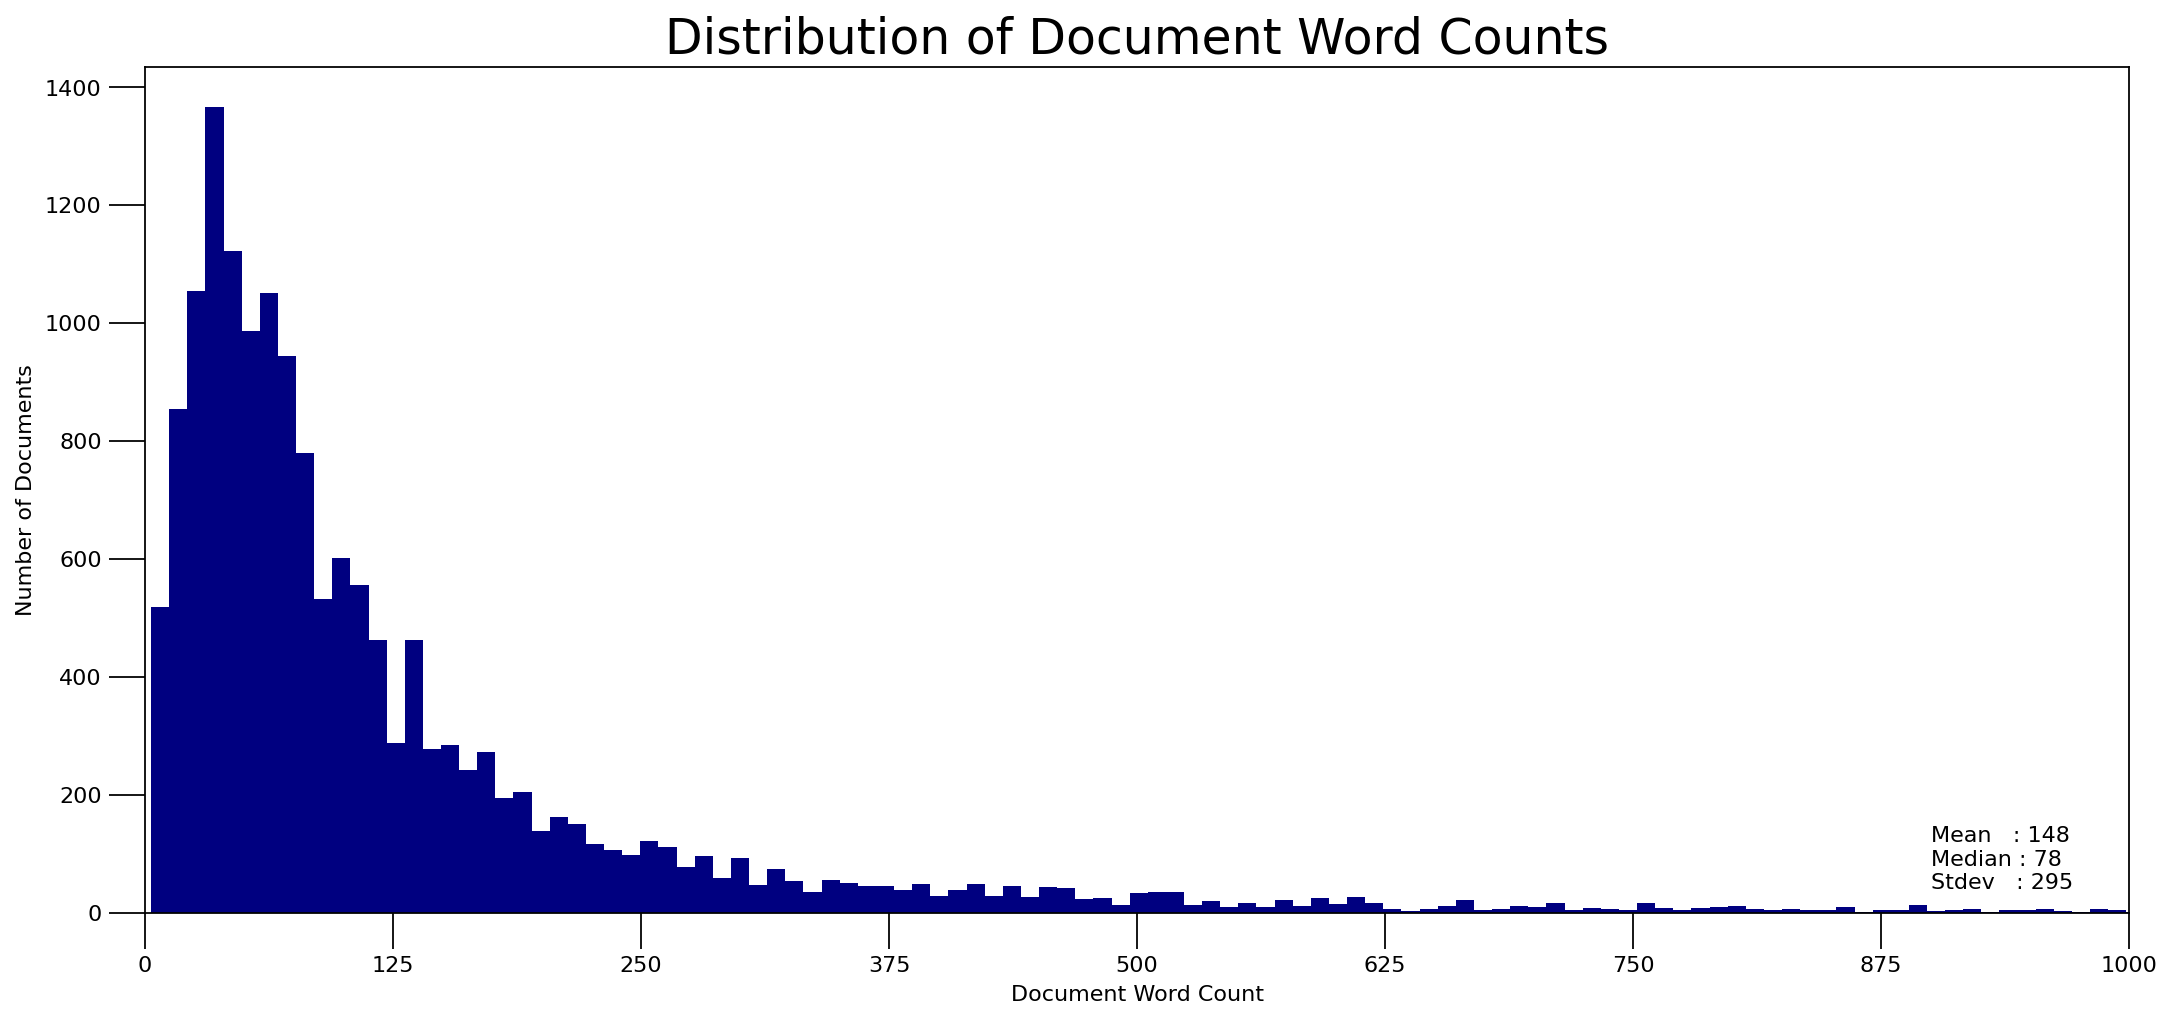

In [180]:
#Replicate Figure 3
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(900, 120, "Mean   : " + str(round(np.mean(doc_lens))))

plt.text(900,  80, "Median : " + str(round(np.median(doc_lens))))
plt.text(900,  40, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()